In [227]:
import sys
import scipy
import numpy
import matplotlib 
import pandas
import sklearn

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler

In [229]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import naive_bayes

In [230]:
import pandas as pd
xl = pd.ExcelFile("C:/Users/Lina/Desktop/zitouna_i_all_ 50.xlsx")
xl.sheet_names

['zitouna_i_all']

In [231]:
df = xl.parse("zitouna_i_all")

In [237]:
import numpy as np

df_colums=np.array(df.columns)
df_colums_ln=len(df_colums)

In [240]:
reponces={}
for i in df_colums:
    g = df.groupby(df[i])
    reponces[i]=list(g.groups)

In [242]:
zitouna=pd.DataFrame()

In [243]:
#print(reponces['pack\n'])

In [244]:
zitouna['homme']=(df['Genre ']=='Homme ').astype(int)
zitouna['pourPack']=(df['packOUI ']=='Oui').astype(int)
zitouna['contrePack']=(df['packOUI ']=='Non ').astype(int)
zitouna['avisPack']=(df['pack\n']=='IntÃ©ressant').astype(int)
zitouna['interPack']=(df['pack\n']=='TrÃ¨s intÃ©ressant ').astype(int)
zitouna['enLigne']=(df['enLigne']=='TrÃ¨s souvent').astype(int)
zitouna['enLigneR']=(df['enLigne']=='Rarement').astype(int)
zitouna['enLignett']=(df['enLigne']=='De temps en Temps').astype(int)
zitouna['carte']=(df['moyen']=='Carte bancaire').astype(int)
zitouna['cheque']=(df['moyen']=='ChÃ¨que').astype(int)
zitouna['liquide']=(df['moyen']=='Liquide').astype(int)
zitouna['Age18']=(df['Age']=='18-29 ans').astype(int)
zitouna['Age30']=(df['Age']=='30-39 ans').astype(int)
zitouna['Age40']=(df['Age']=='40-49 ans').astype(int)
zitouna['Age50']=(df['Age']=='50-59 ans').astype(int)
zitouna['avecgammes']=(df['gammes\n']=="Tout Ã\xa0 fait d'accord").astype(int)
zitouna['nongammes']=(df['gammes\n']=="PlutÃ´t pas d'accord").astype(int)
zitouna['ouigammes']=(df['gammes\n']=="PlutÃ´t d'accord").astype(int)
zitouna['contregammes']=(df['gammes\n']=="Pas du tout d'accord").astype(int)
#zitouna['gammes']=(df['gammes\n']=='Neutre').astype(int)
zitouna['avecpersonnel']=(df['personnel\n']=="Tout Ã\xa0 fait d'accord").astype(int)
zitouna['nonpersonnel']=(df['personnel\n']=="PlutÃ´t pas d'accord").astype(int)
zitouna['ouipersonnel']=(df['personnel\n']=="PlutÃ´t d'accord").astype(int)
zitouna['contrepersonnel']=(df['personnel\n']=="Pas du tout d'accord").astype(int)
#zitouna['personnel']=(df['personnel\n']=='Neutre').astype(int)
zitouna['avecqualite']=(df['qualite\n']=="Tout Ã\xa0 fait d'accord").astype(int)
zitouna['nonqualite']=(df['qualite\n']=="PlutÃ´t pas d'accord").astype(int)
zitouna['ouiqualite']=(df['qualite\n']=="PlutÃ´t d'accord").astype(int)
zitouna['contrequalite']=(df['qualite\n']=="Pas du tout d'accord").astype(int)
#zitouna['qualite']=(df['qualite\n']=='Neutre').astype(int)
zitouna['avecFrais']=(df['Frais\n']=="Tout Ã\xa0 fait d'accord").astype(int)
zitouna['nonFrais']=(df['Frais\n']=="PlutÃ´t pas d'accord").astype(int)
zitouna['ouiFrais']=(df['Frais\n']=="PlutÃ´t d'accord").astype(int)
zitouna['contreFrais']=(df['Frais\n']=="Pas du tout d'accord").astype(int)
#zitouna['Frais']=(df['Frais\n']=='Neutre').astype(int)
zitouna['Salaire1000']=(df['Salaire\n']=='[0 - 1000]').astype(int)
zitouna['Salaire2000']=(df['Salaire\n']=='[1000-2000]').astype(int)
zitouna['Salaire3000']=(df['Salaire\n']=='[2000-3000]').astype(int)
#zitouna['Salaire']=(df['Salaire\n']=="'+ de 3000").astype(int)
zitouna['actif']=(df['prof\n']=='Actif/OccupÃ©').astype(int)
zitouna['foyer']=(df['prof\n']=='Au foyer').astype(int)
zitouna['etudiant']=(df['prof\n']=='Etudiant ').astype(int)
zitouna['retraite']=(df['prof\n']=='RetraitÃ©').astype(int)
#zitouna['chomeur']=(df['prof\n']=='chÃ´meur').astype(int)

In [245]:
zitouna['nipournicontrepack']=(zitouna.pourPack + zitouna.contrePack )* (-1) +1
zitouna['package']=zitouna.pourPack + zitouna.contrePack *2 
zitouna['notcontrepack']=zitouna.contrePack * (-1) +1

In [246]:
zitouna.columns

Index(['homme', 'pourPack', 'contrePack', 'avisPack', 'interPack', 'enLigne',
       'enLigneR', 'enLignett', 'carte', 'cheque', 'liquide', 'Age18', 'Age30',
       'Age40', 'Age50', 'avecgammes', 'nongammes', 'ouigammes',
       'contregammes', 'avecpersonnel', 'nonpersonnel', 'ouipersonnel',
       'contrepersonnel', 'avecqualite', 'nonqualite', 'ouiqualite',
       'contrequalite', 'avecFrais', 'nonFrais', 'ouiFrais', 'contreFrais',
       'Salaire1000', 'Salaire2000', 'Salaire3000', 'actif', 'foyer',
       'etudiant', 'retraite', 'nipournicontrepack', 'package',
       'notcontrepack'],
      dtype='object')

In [247]:
zitouna2=zitouna
target_name='contrePack'
X=zitouna.drop(['pourPack','contrePack','package','nipournicontrepack'],axis=1)
#rs=RobustScaler()
#X=rs.fit_transform(X)
y=zitouna[target_name]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5, stratify=y)

In [248]:
algos = ["LinearDiscriminantAnalysis","Support Vector Machine","Decision Tree","Random Forest","Logistic Regression","K Nearest Neighbor","Naive Bayes"]

In [249]:
clfs = [LinearDiscriminantAnalysis(),svm.SVC(kernel="linear"),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB()]

In [250]:
def Metric(x_train,x_test):
    accuracy1=[]
    precision1=[]
    recall1=[]
    algo1=[]

    for clff in clfs:
        clff.fit(x_train,y_train)
        y_pred_test=clff.predict(x_test)
        accuracy2=accuracy_score(y_pred=y_pred_test,y_true=y_test)
        precision2= precision_score(y_pred=y_pred_test,y_true=y_test)#, average='micro'
        recall2= recall_score(y_pred=y_pred_test,y_true=y_test)
        accuracy1.append(100*accuracy2)
        precision1.append(100*precision2)
        recall1.append(100*recall2)
        algo1.append(clff)
        CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)
        CMatrix(CM)


    metric1=pd.DataFrame({'accuracy':accuracy1,'precision':precision1,'recall':recall1},index=algos)
    print(metric1)

    print(x_train.columns)

    print("Nombre d'attributs : ",x_train.shape[1])
    fig,ax = plt.subplots(figsize=(10,5))
    metric1.plot(kind='barh',ax=ax)
    ax.grid()

In [251]:
def CMatrix(CM, labels=['notcontrepack','contrePack']):
    dff=pd.DataFrame(data=CM, index=labels,columns=labels)
    dff.index.name='TRUE'
    dff.columns.name='PREDICTION'
    dff.loc['Total']=dff.sum()
    dff['Total']=dff.sum(axis=1)
    return dff

In [252]:
y_pred_test=np.repeat(y_train.value_counts().idxmax(),y_test.size)

print("accuracy : ",accuracy_score(y_pred=y_pred_test,y_true=y_test))
print("precision : ",precision_score(y_pred=y_pred_test,y_true=y_test))
print("recall : ",recall_score(y_pred=y_pred_test,y_true=y_test))

CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

accuracy :  0.6666666666666666
precision :  0.0
recall :  0.0


c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


PREDICTION,notcontrepack,contrePack,Total
TRUE,,,
notcontrepack,18,0,18
contrePack,9,0,9
Total,27,0,27


c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                             accuracy  precision     recall
LinearDiscriminantAnalysis  74.074074  58.333333  77.777778
Support Vector Machine      70.370370  54.545455  66.666667
Decision Tree               66.666667  50.000000  44.444444
Random Forest               66.666667  50.000000  22.222222
Logistic Regression         74.074074  62.500000  55.555556
K Nearest Neighbor          66.666667   0.000000   0.000000
Naive Bayes                 66.666667  50.000000  77.777778
Index(['homme', 'avisPack', 'interPack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'liquide', 'Age18', 'Age30', 'Age40', 'Age50',
       'avecgammes', 'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire1000', 'Salaire2000', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite'],
      dtype

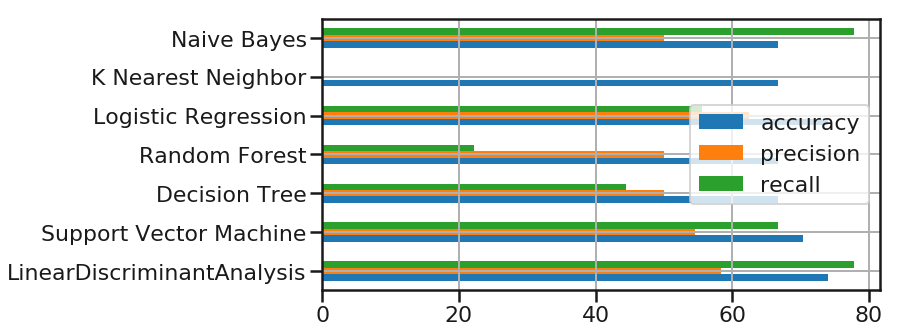

In [253]:

x_train6=x_train.drop([ 'notcontrepack'],axis=1)
x_test6=x_test.drop([ 'notcontrepack'],axis=1)
Metric(x_train6,x_test6)

In [254]:
gaus=naive_bayes.GaussianNB()
gaus.fit(x_train,y_train)
metrics = pd.DataFrame(index=['accuracy','precision','recall'])
y_pred_test=gaus.predict(x_test)
metrics.loc['accuracy']= accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision']= precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall']= recall_score(y_pred=y_pred_test,y_true=y_test)
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

PREDICTION,notcontrepack,contrePack,Total
TRUE,,,
notcontrepack,17,1,18
contrePack,1,8,9
Total,18,9,27


In [255]:
combine=[x_train,x_test]

In [256]:
print(zitouna.columns)
#print(zitouna.head(3))

Index(['homme', 'pourPack', 'contrePack', 'avisPack', 'interPack', 'enLigne',
       'enLigneR', 'enLignett', 'carte', 'cheque', 'liquide', 'Age18', 'Age30',
       'Age40', 'Age50', 'avecgammes', 'nongammes', 'ouigammes',
       'contregammes', 'avecpersonnel', 'nonpersonnel', 'ouipersonnel',
       'contrepersonnel', 'avecqualite', 'nonqualite', 'ouiqualite',
       'contrequalite', 'avecFrais', 'nonFrais', 'ouiFrais', 'contreFrais',
       'Salaire1000', 'Salaire2000', 'Salaire3000', 'actif', 'foyer',
       'etudiant', 'retraite', 'nipournicontrepack', 'package',
       'notcontrepack'],
      dtype='object')


In [257]:
for comb in combine:
    comb['pack']=comb.avisPack + comb.interPack *2
    comb['ligne']=comb.enLigne + comb.enLigneR*2 + comb.enLignett*3
    comb['moyen']=comb.carte * 3 + comb.cheque*2 + comb.liquide 
    comb['age']=comb.Age18 + comb.Age30 *2 + comb.Age40 *3 + comb.Age50 *4
    comb['gamme']=comb.avecgammes + comb.nongammes *2 + comb.ouigammes * 3+ comb.contregammes *4
    comb['personne']=comb.avecpersonnel + comb.nonpersonnel*2 + comb.ouipersonnel *3 + comb.contrepersonnel *4
    comb['qualite']=comb.avecqualite + comb.nonqualite *2 + comb.ouiqualite *3 + comb.contrequalite *4
    comb['frais']=comb.avecFrais + comb.nonFrais *2 + comb.ouiFrais *3+ comb.contreFrais *4
    comb['salaire']=comb.Salaire1000 + comb.Salaire2000 *2 + comb.Salaire3000 *3
    comb['profession']=comb.actif + comb.foyer *2 + comb.etudiant*3 + comb.retraite *4
    comb['veuxpaspack']=((comb.avisPack + comb.interPack) -1) * (-1)

for comb in combine:
    comb['genre_age_profession']=comb.homme * comb.age * comb.profession
    comb['pack_gamme']=comb.pack * comb.gamme
    comb['profession_frais_salaire']=comb.profession * comb.frais * comb.salaire
    comb['moyen_frais_salaire']=comb.moyen * comb.frais * comb.salaire
    comb['ligne_frais_salaire']=comb.ligne * comb.frais * comb.salaire
    comb['moyen_ligne_salaire']=comb.moyen * comb.ligne * comb.salaire
    comb['ligne_frais_moyen']=comb.moyen * comb.frais * comb.ligne
    comb['ligne_moyen_frais_salaire']=comb.moyen * comb.frais * comb.salaire * comb.ligne
    
    comb['Salaire2000_Age30']=comb.Salaire2000 * comb.Age30 
    comb['Salaire2000_retraite']=comb.Salaire2000 * comb.retraite

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                             accuracy  precision     recall
LinearDiscriminantAnalysis  66.666667  50.000000  44.444444
Support Vector Machine      70.370370  53.846154  77.777778
Decision Tree               74.074074  60.000000  66.666667
Random Forest               66.666667  50.000000  33.333333
Logistic Regression         66.666667  50.000000  55.555556
K Nearest Neighbor          66.666667   0.000000   0.000000
Naive Bayes                 59.259259  40.000000  44.444444
Index(['homme', 'avisPack', 'interPack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'liquide', 'Age18', 'Age30', 'Age40', 'Age50',
       'avecgammes', 'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire1000', 'Salaire2000', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite', 'pack', 'lig

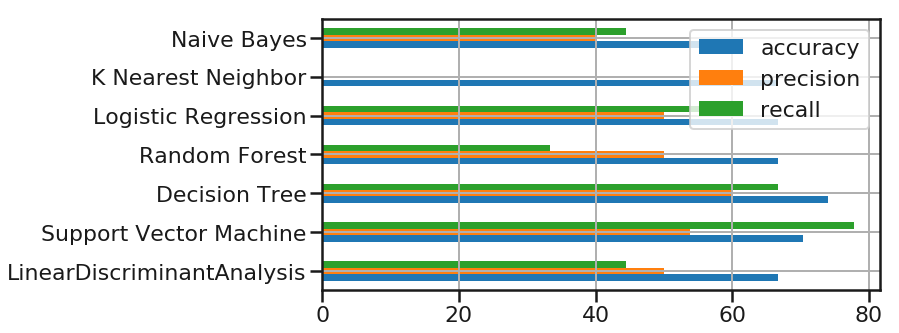

In [258]:
x_train6=x_train.drop([  'notcontrepack'],axis=1)
x_test6=x_test.drop([ 'notcontrepack'],axis=1)

Metric(x_train6,x_test6)

In [259]:
x_train.columns

Index(['homme', 'avisPack', 'interPack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'liquide', 'Age18', 'Age30', 'Age40', 'Age50',
       'avecgammes', 'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire1000', 'Salaire2000', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite', 'notcontrepack', 'pack',
       'ligne', 'moyen', 'age', 'gamme', 'personne', 'qualite', 'frais',
       'salaire', 'profession', 'veuxpaspack', 'genre_age_profession',
       'pack_gamme', 'profession_frais_salaire', 'moyen_frais_salaire',
       'ligne_frais_salaire', 'moyen_ligne_salaire', 'ligne_frais_moyen',
       'ligne_moyen_frais_salaire', 'Salaire2000_Age30',
       'Salaire2000_retraite'],
      dtype='object')

In [291]:
#x_train.iloc[:4,1:3]

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                             accuracy  precision     recall
LinearDiscriminantAnalysis  70.370370  53.846154  77.777778
Support Vector Machine      70.370370  54.545455  66.666667
Decision Tree               88.888889  87.500000  77.777778
Random Forest               77.777778  80.000000  44.444444
Logistic Regression         70.370370  54.545455  66.666667
K Nearest Neighbor          66.666667   0.000000   0.000000
Naive Bayes                 62.962963  45.454545  55.555556
Index(['homme', 'pack', 'ligne', 'moyen', 'age', 'gamme', 'personne',
       'qualite', 'frais', 'salaire', 'profession', 'veuxpaspack',
       'genre_age_profession', 'pack_gamme', 'profession_frais_salaire',
       'moyen_frais_salaire', 'ligne_frais_salaire', 'moyen_ligne_salaire',
       'ligne_frais_moyen', 'ligne_moyen_frais_salaire', 'Salaire2000_Age30',
       'Salaire2000_retraite'],
      dtype='object')
Nombre d'attributs :  22


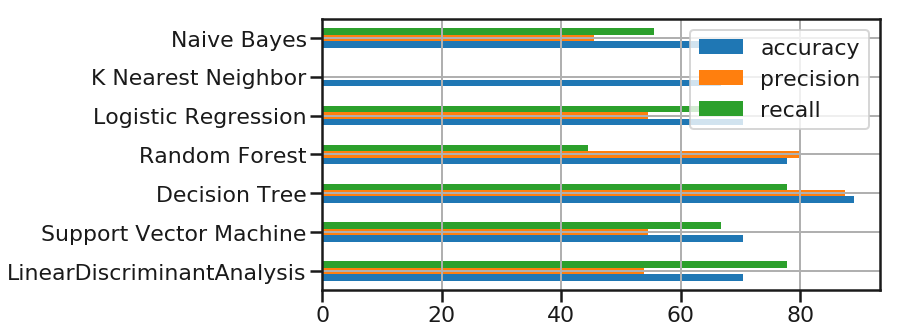

In [261]:
x_train1=x_train.drop([ 'avisPack', 'notcontrepack','liquide','interPack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'Age18', 'Age30', 'Age40', 'Age50', 'avecgammes',
       'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire1000', 'Salaire2000', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite'],axis=1)
x_test1=x_test.drop([ 'avisPack', 'notcontrepack','interPack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'Age18', 'Age30', 'Age40', 'Age50', 'avecgammes',
       'nongammes', 'ouigammes', 'contregammes', 'liquide','avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire1000', 'Salaire2000', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite'],axis=1)

Metric(x_train1,x_test1)

In [262]:
x_train.columns

Index(['homme', 'avisPack', 'interPack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'liquide', 'Age18', 'Age30', 'Age40', 'Age50',
       'avecgammes', 'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire1000', 'Salaire2000', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite', 'notcontrepack', 'pack',
       'ligne', 'moyen', 'age', 'gamme', 'personne', 'qualite', 'frais',
       'salaire', 'profession', 'veuxpaspack', 'genre_age_profession',
       'pack_gamme', 'profession_frais_salaire', 'moyen_frais_salaire',
       'ligne_frais_salaire', 'moyen_ligne_salaire', 'ligne_frais_moyen',
       'ligne_moyen_frais_salaire', 'Salaire2000_Age30',
       'Salaire2000_retraite'],
      dtype='object')

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                             accuracy   precision     recall
LinearDiscriminantAnalysis  77.777778   71.428571  55.555556
Support Vector Machine      81.481481   83.333333  55.555556
Decision Tree               81.481481   83.333333  55.555556
Random Forest               74.074074  100.000000  22.222222
Logistic Regression         81.481481   83.333333  55.555556
K Nearest Neighbor          66.666667    0.000000   0.000000
Naive Bayes                 29.629630   27.272727  66.666667
Index(['veuxpaspack', 'genre_age_profession', 'pack_gamme',
       'profession_frais_salaire', 'moyen_frais_salaire',
       'ligne_frais_salaire', 'moyen_ligne_salaire', 'ligne_frais_moyen',
       'ligne_moyen_frais_salaire', 'Salaire2000_Age30',
       'Salaire2000_retraite'],
      dtype='object')
Nombre d'attributs :  11


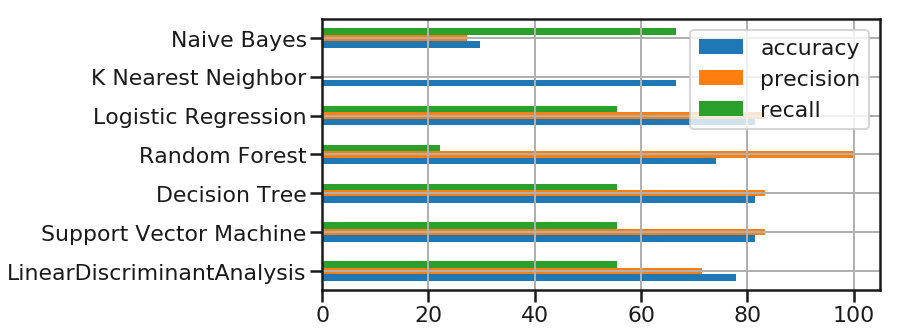

In [263]:
x_train2=x_train1.drop(['homme', 'pack', 'ligne', 'moyen', 'age', 'gamme', 'personne',
       'qualite', 'frais', 'salaire', 'profession'],axis=1)
x_test2=x_test1.drop(['homme', 'pack', 'ligne', 'moyen', 'age', 'gamme', 'personne',
       'qualite', 'frais', 'salaire', 'profession'],axis=1)

Metric(x_train2,x_test2)

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                             accuracy   precision     recall
LinearDiscriminantAnalysis  62.962963   40.000000  22.222222
Support Vector Machine      66.666667    0.000000   0.000000
Decision Tree               77.777778   71.428571  55.555556
Random Forest               77.777778   71.428571  55.555556
Logistic Regression         70.370370  100.000000  11.111111
K Nearest Neighbor          77.777778  100.000000  33.333333
Naive Bayes                 29.629630   27.272727  66.666667
Index(['veuxpaspack', 'pack_gamme', 'moyen_frais_salaire', 'Salaire2000_Age30',
       'Salaire2000_retraite'],
      dtype='object')
Nombre d'attributs :  5


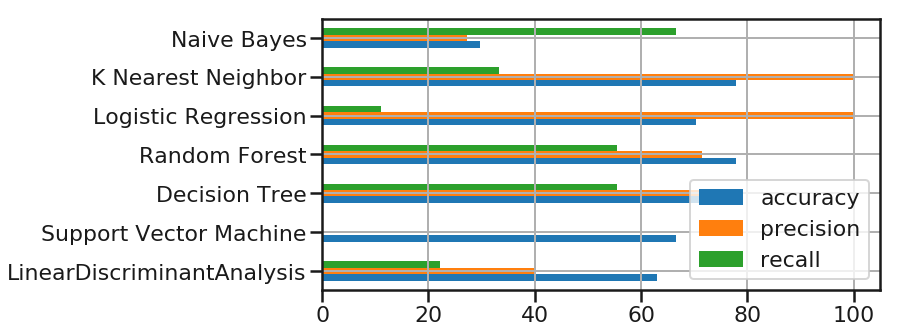

In [264]:
x_train3=x_train2.drop(['genre_age_profession', 'profession_frais_salaire', 'ligne_frais_salaire', 'moyen_ligne_salaire','ligne_frais_moyen', 'ligne_moyen_frais_salaire'],axis=1)
x_test3=x_test2.drop(['genre_age_profession', 'profession_frais_salaire', 'ligne_frais_salaire', 'moyen_ligne_salaire','ligne_frais_moyen', 'ligne_moyen_frais_salaire'],axis=1)

Metric(x_train3,x_test3)

In [265]:
gaus=naive_bayes.GaussianNB()
gaus.fit(x_train3,y_train)
metrics = pd.DataFrame(index=['accuracy','precision','recall'])
y_pred_test=gaus.predict(x_test3)
metrics.loc['accuracy']= accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision']= precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall']= recall_score(y_pred=y_pred_test,y_true=y_test)
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

PREDICTION,notcontrepack,contrePack,Total
TRUE,,,
notcontrepack,2,16,18
contrePack,3,6,9
Total,5,22,27


In [266]:
gaus=DecisionTreeClassifier()
gaus.fit(x_train3,y_train)
metrics = pd.DataFrame(index=['accuracy','precision','recall'])
y_pred_test=gaus.predict(x_test3)
metrics.loc['accuracy']= accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision']= precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall']= recall_score(y_pred=y_pred_test,y_true=y_test)
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

PREDICTION,notcontrepack,contrePack,Total
TRUE,,,
notcontrepack,16,2,18
contrePack,4,5,9
Total,20,7,27


c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                             accuracy  precision     recall
LinearDiscriminantAnalysis  70.370370  54.545455  66.666667
Support Vector Machine      74.074074  62.500000  55.555556
Decision Tree               74.074074  60.000000  66.666667
Random Forest               66.666667  50.000000  33.333333
Logistic Regression         62.962963  42.857143  33.333333
K Nearest Neighbor          66.666667  50.000000  11.111111
Naive Bayes                 59.259259  40.000000  44.444444
Index(['homme', 'avisPack', 'interPack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'liquide', 'Age18', 'Age30', 'Age40', 'Age50',
       'avecgammes', 'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire1000', 'Salaire2000', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite', 'pack', 'lig

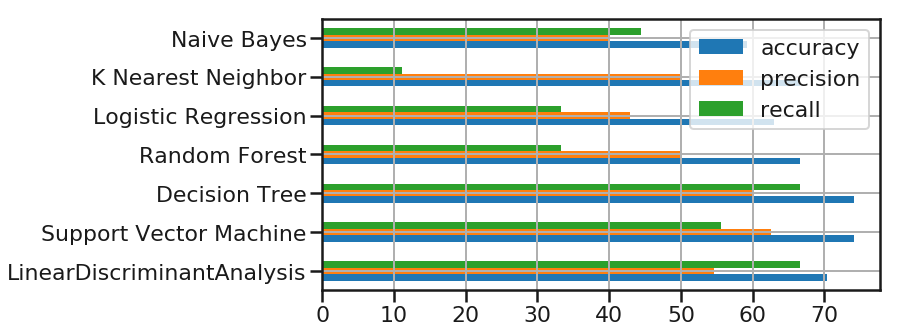

In [267]:
x_train4=x_train.drop(['genre_age_profession','notcontrepack', 'pack_gamme', 'profession_frais_salaire',
       'moyen_frais_salaire', 'ligne_frais_salaire', 'moyen_ligne_salaire',
       'ligne_frais_moyen', 'ligne_moyen_frais_salaire'],axis=1)
x_test4=x_test.drop(['genre_age_profession','notcontrepack', 'pack_gamme', 'profession_frais_salaire',
       'moyen_frais_salaire', 'ligne_frais_salaire', 'moyen_ligne_salaire',
       'ligne_frais_moyen', 'ligne_moyen_frais_salaire'],axis=1)

Metric(x_train4,x_test4)

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_

                             accuracy   precision     recall
LinearDiscriminantAnalysis  62.962963    0.000000   0.000000
Support Vector Machine      66.666667    0.000000   0.000000
Decision Tree               74.074074  100.000000  22.222222
Random Forest               70.370370   66.666667  22.222222
Logistic Regression         66.666667    0.000000   0.000000
K Nearest Neighbor          66.666667    0.000000   0.000000
Naive Bayes                 29.629630   27.272727  66.666667
Index(['veuxpaspack', 'moyen_frais_salaire', 'Salaire2000_Age30',
       'Salaire2000_retraite'],
      dtype='object')
Nombre d'attributs :  4


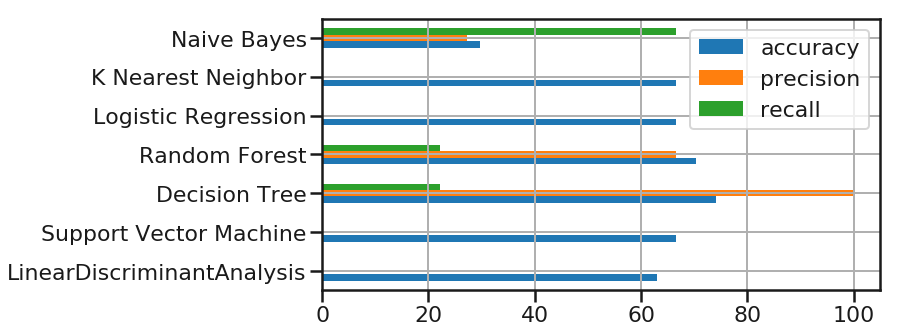

In [268]:
x_train5=x_train3.drop(['pack_gamme'],axis=1)
x_test5=x_test3.drop(['pack_gamme'],axis=1)
Metric(x_train5,x_test5)

In [269]:
gaus=naive_bayes.GaussianNB()
gaus.fit(x_train5,y_train)
metrics = pd.DataFrame(index=['accuracy','precision','recall'])
y_pred_test=gaus.predict(x_test5)
metrics.loc['accuracy']= accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision']= precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall']= recall_score(y_pred=y_pred_test,y_true=y_test)
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

PREDICTION,notcontrepack,contrePack,Total
TRUE,,,
notcontrepack,2,16,18
contrePack,3,6,9
Total,5,22,27


c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                             accuracy   precision     recall
LinearDiscriminantAnalysis  55.555556   40.000000  66.666667
Support Vector Machine      62.962963   45.454545  55.555556
Decision Tree               74.074074   60.000000  66.666667
Random Forest               77.777778  100.000000  33.333333
Logistic Regression         66.666667   50.000000  55.555556
K Nearest Neighbor          66.666667    0.000000   0.000000
Naive Bayes                 59.259259   40.000000  44.444444
Index(['homme', 'enLigne', 'enLigneR', 'enLignett', 'carte', 'cheque',
       'liquide', 'Age18', 'Age30', 'Age40', 'Age50', 'avecgammes',
       'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire1000', 'Salaire2000', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite', 'ligne', 'moyen', 'age',
    

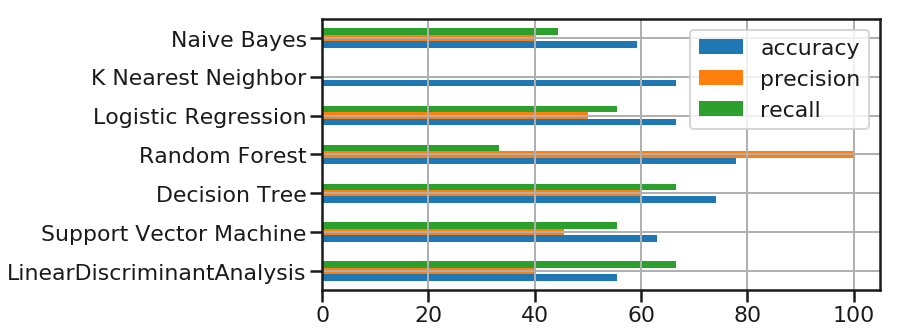

In [270]:
x_train5=x_train.drop([ 'avisPack', 'interPack', 'pack', 'notcontrepack', 'veuxpaspack'],axis=1)
x_test5=x_test.drop(['avisPack', 'interPack', 'pack', 'notcontrepack', 'veuxpaspack'],axis=1)
Metric(x_train5,x_test5)

In [299]:
x_train.pack.head(2)

34    2
21    1
Name: pack, dtype: int32

In [294]:
zitouna.columns

Index(['homme', 'pourPack', 'contrePack', 'avisPack', 'interPack', 'enLigne',
       'enLigneR', 'enLignett', 'carte', 'cheque', 'liquide', 'Age18', 'Age30',
       'Age40', 'Age50', 'avecgammes', 'nongammes', 'ouigammes',
       'contregammes', 'avecpersonnel', 'nonpersonnel', 'ouipersonnel',
       'contrepersonnel', 'avecqualite', 'nonqualite', 'ouiqualite',
       'contrequalite', 'avecFrais', 'nonFrais', 'ouiFrais', 'contreFrais',
       'Salaire1000', 'Salaire2000', 'Salaire3000', 'actif', 'foyer',
       'etudiant', 'retraite', 'nipournicontrepack', 'package',
       'notcontrepack', 'pourcontrepack', 'avispack', 'ligne', 'moyen', 'age',
       'gamme', 'personne', 'qualite', 'frais', 'salaire', 'profession',
       'genre_age_profession', 'pack_gamme', 'profession_frais_salaire',
       'moyen_frais_salaire', 'ligne_frais_salaire', 'moyen_ligne_salaire',
       'ligne_frais_moyen', 'ligne_moyen_frais_salaire'],
      dtype='object')

In [302]:
for comb in zitouna.columns:
    zitouna['pack']=zitouna.avisPack + zitouna.interPack *2
    zitouna['veuxpaspack']=((zitouna.avisPack + zitouna.interPack) -1) * (-1)

In [303]:
target_name='pack'
X=zitouna.drop(['avisPack', 'interPack','veuxpaspack'],axis=1)
#rs=RobustScaler()
#X=rs.fit_transform(X)
y=zitouna[target_name]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5, stratify=y)

In [329]:
def Metric(x_train,x_test):
    accuracy1=[]
    precision1=[]
    recall1=[]
    algo1=[]

    for clff in clfs:
        clff.fit(x_train,y_train)
        y_pred_test=clff.predict(x_test)
        accuracy2=accuracy_score(y_pred=y_pred_test,y_true=y_test)
        precision2= precision_score(y_pred=y_pred_test,y_true=y_test, average='micro')#, average='micro'
        recall2= recall_score(y_pred=y_pred_test,y_true=y_test, average='micro')
        accuracy1.append(100*accuracy2)
        precision1.append(100*precision2)
        recall1.append(100*recall2)
        algo1.append(clff)
        CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)
        CMatrix(CM)


    metric1=pd.DataFrame({'accuracy':accuracy1},index=algos)
    print(metric1)

    print(x_train.columns)

    print("Nombre d'attributs : ",x_train.shape[1])
    #fig,ax = plt.subplots(figsize=(10,5))
    #metric1.plot(kind='barh',ax=ax)
    #ax.grid()

In [330]:
def CMatrix(CM, labels=['avisPack', 'interPack','veuxpaspack']):
    dff=pd.DataFrame(data=CM, index=labels,columns=labels)
    dff.index.name='TRUE'
    dff.columns.name='PREDICTION'
    dff.loc['Total']=dff.sum()
    dff['Total']=dff.sum(axis=1)
    return dff

In [331]:
#x_train=x_train.drop([ 'avispack', 'pack'],axis=1)
#x_test=x_test.drop([ 'avispack', 'pack'],axis=1)
Metric(x_train,x_test)

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


                             accuracy
LinearDiscriminantAnalysis  66.666667
Support Vector Machine      62.962963
Decision Tree               77.777778
Random Forest               62.962963
Logistic Regression         70.370370
K Nearest Neighbor          62.962963
Naive Bayes                 74.074074
Index(['homme', 'pourPack', 'contrePack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'liquide', 'Age18', 'Age30', 'Age40', 'Age50',
       'avecgammes', 'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire1000', 'Salaire2000', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite', 'nipournicontrepack',
       'package', 'notcontrepack', 'pourcontrepack', 'ligne', 'moyen', 'age',
       'gamme', 'personne', 'qualite', 'frais', 'salaire', 'profession',
       'genre_

In [332]:
gaus==DecisionTreeClassifier()
gaus.fit(x_train,y_train)
metrics = pd.DataFrame(index=['accuracy','precision','recall'])
y_pred_test=gaus.predict(x_test)
metrics.loc['accuracy']= accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision']= precision_score(y_pred=y_pred_test,y_true=y_test, average='micro')
metrics.loc['recall']= recall_score(y_pred=y_pred_test,y_true=y_test, average='micro')
CM=confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

PREDICTION,avisPack,interPack,veuxpaspack,Total
TRUE,,,,
avisPack,11,2,0,13
interPack,1,8,1,10
veuxpaspack,0,3,1,4
Total,12,13,2,27


In [323]:
x_train5=x_train.drop([ 'Salaire1000', 'pourPack', 'contrePack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'liquide', 'Age18', 'Age30', 'Age40', 'Age50',
       'avecgammes', 'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire2000', 'ligne_moyen_frais_salaire', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite', 'nipournicontrepack',
       'package', 'pourcontrepack', 'homme', 'ligne', 'moyen', 'age',
       'gamme', 'personne', 'qualite', 'frais', 'salaire', 'profession',
       'genre_age_profession', 'pack_gamme', 'profession_frais_salaire',
       'moyen_frais_salaire', 'ligne_frais_salaire', 'moyen_ligne_salaire',
       'ligne_frais_moyen'],axis=1)
x_test5=x_test.drop([ 'Salaire1000', 'pourPack', 'contrePack', 'enLigne', 'enLigneR', 'enLignett',
       'carte', 'cheque', 'liquide', 'Age18', 'Age30', 'Age40', 'Age50',
       'avecgammes', 'nongammes', 'ouigammes', 'contregammes', 'avecpersonnel',
       'nonpersonnel', 'ouipersonnel', 'contrepersonnel', 'avecqualite',
       'nonqualite', 'ouiqualite', 'contrequalite', 'avecFrais', 'nonFrais',
       'ouiFrais', 'contreFrais', 'Salaire2000', 'ligne_moyen_frais_salaire', 'Salaire3000',
       'actif', 'foyer', 'etudiant', 'retraite', 'nipournicontrepack',
       'package', 'pourcontrepack', 'homme', 'ligne', 'moyen', 'age',
       'gamme', 'personne', 'qualite', 'frais', 'salaire', 'profession',
       'genre_age_profession', 'pack_gamme', 'profession_frais_salaire',
       'moyen_frais_salaire', 'ligne_frais_salaire', 'moyen_ligne_salaire',
       'ligne_frais_moyen'],axis=1)
Metric(x_train5,x_test5)

                             accuracy  precision     recall
LinearDiscriminantAnalysis  48.148148  48.148148  48.148148
Support Vector Machine      48.148148  48.148148  48.148148
Decision Tree               48.148148  48.148148  48.148148
Random Forest               48.148148  48.148148  48.148148
Logistic Regression         48.148148  48.148148  48.148148
K Nearest Neighbor          48.148148  48.148148  48.148148
Naive Bayes                 48.148148  48.148148  48.148148
Index(['notcontrepack'], dtype='object')
Nombre d'attributs :  1


c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [271]:
zitouna2.columns

Index(['homme', 'pourPack', 'contrePack', 'avisPack', 'interPack', 'enLigne',
       'enLigneR', 'enLignett', 'carte', 'cheque', 'liquide', 'Age18', 'Age30',
       'Age40', 'Age50', 'avecgammes', 'nongammes', 'ouigammes',
       'contregammes', 'avecpersonnel', 'nonpersonnel', 'ouipersonnel',
       'contrepersonnel', 'avecqualite', 'nonqualite', 'ouiqualite',
       'contrequalite', 'avecFrais', 'nonFrais', 'ouiFrais', 'contreFrais',
       'Salaire1000', 'Salaire2000', 'Salaire3000', 'actif', 'foyer',
       'etudiant', 'retraite', 'nipournicontrepack', 'package',
       'notcontrepack'],
      dtype='object')

In [272]:
for comb in zitouna2.columns:
    zitouna2['pourcontrepack']=zitouna2.pourPack + zitouna2.contrePack 
    zitouna2['avispack']=zitouna2.avisPack + zitouna2.interPack *2
    zitouna2['ligne']=zitouna2.enLigne + zitouna2.enLigneR*2 + zitouna2.enLignett*3
    zitouna2['moyen']=zitouna2.carte*3 + zitouna2.cheque*2  + zitouna2.liquide
    zitouna2['age']=zitouna2.Age18 + zitouna2.Age30 *2 + zitouna2.Age40 *3 + zitouna2.Age50 *4
    zitouna2['gamme']=zitouna2.avecgammes + zitouna2.nongammes *2 + zitouna2.ouigammes * 3+ zitouna2.contregammes *4
    zitouna2['personne']=zitouna2.avecpersonnel + zitouna2.nonpersonnel*2 + zitouna2.ouipersonnel *3 + zitouna2.contrepersonnel *4
    zitouna2['qualite']=zitouna2.avecqualite + zitouna2.nonqualite *2 + zitouna2.ouiqualite *3 + zitouna2.contrequalite *4
    zitouna2['frais']=zitouna2.avecFrais + zitouna2.nonFrais *2 + zitouna2.ouiFrais *3+ zitouna2.contreFrais *4
    zitouna2['salaire']=zitouna2.Salaire1000 + zitouna2.Salaire2000 *2 + zitouna2.Salaire3000 *3
    zitouna2['profession']=zitouna2.actif + zitouna2.foyer *2 + zitouna2.etudiant*3 + zitouna2.retraite *4

for comb in zitouna2.columns:
    zitouna2['genre_age_profession']=zitouna2.homme * zitouna2.age * zitouna2.profession
    zitouna2['pack_gamme']=zitouna2.avispack * zitouna2.gamme
    zitouna2['profession_frais_salaire']=zitouna2.profession * zitouna2.frais * zitouna2.salaire
    zitouna2['moyen_frais_salaire']=zitouna2.moyen * zitouna2.frais * zitouna2.salaire
    zitouna2['ligne_frais_salaire']=zitouna2.ligne * zitouna2.frais * zitouna2.salaire
    zitouna2['moyen_ligne_salaire']=zitouna2.moyen * zitouna2.ligne * zitouna2.salaire
    zitouna2['ligne_frais_moyen']=zitouna2.moyen * zitouna2.frais * zitouna2.ligne
    zitouna2['ligne_moyen_frais_salaire']=zitouna2.moyen * zitouna2.frais * zitouna2.salaire * zitouna2.ligne

In [273]:
zitouna2.columns

Index(['homme', 'pourPack', 'contrePack', 'avisPack', 'interPack', 'enLigne',
       'enLigneR', 'enLignett', 'carte', 'cheque', 'liquide', 'Age18', 'Age30',
       'Age40', 'Age50', 'avecgammes', 'nongammes', 'ouigammes',
       'contregammes', 'avecpersonnel', 'nonpersonnel', 'ouipersonnel',
       'contrepersonnel', 'avecqualite', 'nonqualite', 'ouiqualite',
       'contrequalite', 'avecFrais', 'nonFrais', 'ouiFrais', 'contreFrais',
       'Salaire1000', 'Salaire2000', 'Salaire3000', 'actif', 'foyer',
       'etudiant', 'retraite', 'nipournicontrepack', 'package',
       'notcontrepack', 'pourcontrepack', 'avispack', 'ligne', 'moyen', 'age',
       'gamme', 'personne', 'qualite', 'frais', 'salaire', 'profession',
       'genre_age_profession', 'pack_gamme', 'profession_frais_salaire',
       'moyen_frais_salaire', 'ligne_frais_salaire', 'moyen_ligne_salaire',
       'ligne_frais_moyen', 'ligne_moyen_frais_salaire'],
      dtype='object')

In [274]:
zitouna2=zitouna2.drop([ 'interPack', 'avisPack',  'enLigne',
       'enLigneR', 'enLignett', 'carte', 'cheque', 'liquide', 'Age18', 'Age30',
       'Age40', 'Age50', 'avecgammes', 'nongammes', 'ouigammes',
       'contregammes', 'avecpersonnel', 'nonpersonnel', 'ouipersonnel',
       'contrepersonnel', 'avecqualite', 'nonqualite', 'ouiqualite',
       'contrequalite', 'avecFrais', 'nonFrais', 'ouiFrais', 'contreFrais',
       'Salaire1000', 'Salaire2000', 'Salaire3000', 'actif', 'foyer',
       'etudiant', 'retraite'],axis=1)

In [275]:
zitouna2=zitouna2.drop([  'nipournicontrepack',
       'pourcontrepack' ],axis=1)

In [276]:
zitouna2.columns

Index(['homme', 'pourPack', 'contrePack', 'package', 'notcontrepack',
       'avispack', 'ligne', 'moyen', 'age', 'gamme', 'personne', 'qualite',
       'frais', 'salaire', 'profession', 'genre_age_profession', 'pack_gamme',
       'profession_frais_salaire', 'moyen_frais_salaire',
       'ligne_frais_salaire', 'moyen_ligne_salaire', 'ligne_frais_moyen',
       'ligne_moyen_frais_salaire'],
      dtype='object')

In [277]:
export_excel = zitouna2.to_excel (r'C:\Users\Lina\Desktop\zitouna3.xlsx', index = None, header=True) 

In [278]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [279]:
data = zitouna

In [280]:
zitouna2.columns  

Index(['homme', 'pourPack', 'contrePack', 'package', 'notcontrepack',
       'avispack', 'ligne', 'moyen', 'age', 'gamme', 'personne', 'qualite',
       'frais', 'salaire', 'profession', 'genre_age_profession', 'pack_gamme',
       'profession_frais_salaire', 'moyen_frais_salaire',
       'ligne_frais_salaire', 'moyen_ligne_salaire', 'ligne_frais_moyen',
       'ligne_moyen_frais_salaire'],
      dtype='object')

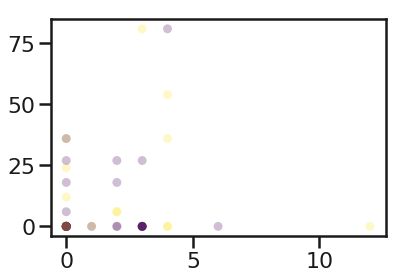

In [281]:
#Xy = pd.DataFrame(dict(x1=x_train.iloc[:,0], x2=x_train.iloc[:,1],label=y_train))
#groups = Xy.groupby(y_train)
#for idx, classification in groups:
    #print(idx)
    #print(classification.label)

plt.scatter(zitouna.genre_age_profession, zitouna.ligne_moyen_frais_salaire, c=zitouna.contrePack, **plot_kwds)
frame = plt.gca()

In [282]:
#data.T[:]

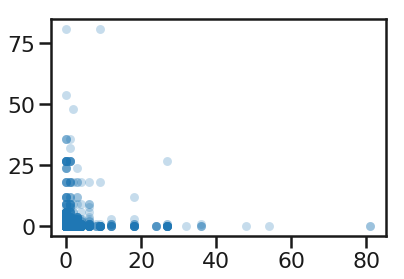

In [283]:
plt.scatter(zitouna, zitouna.T[:], **plot_kwds)
frame = plt.gca()


In [284]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(zitouna, zitouna.T[:], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

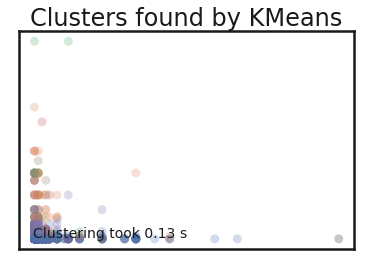

In [285]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

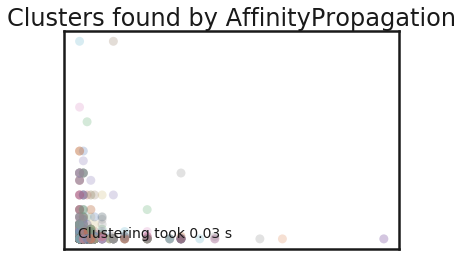

In [286]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

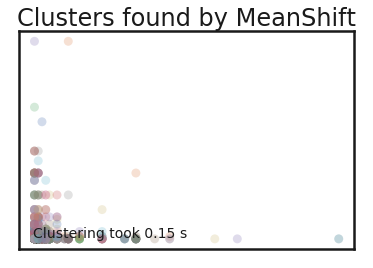

In [287]:
plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  n_init=n_init)


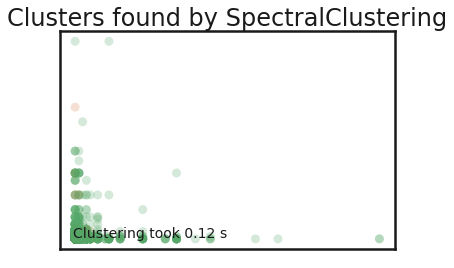

In [288]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

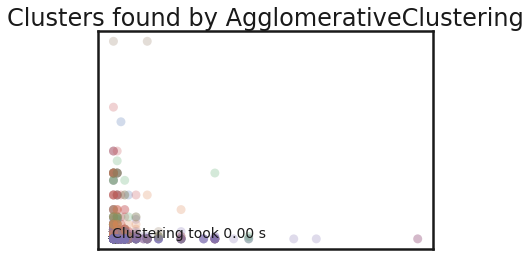

In [289]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

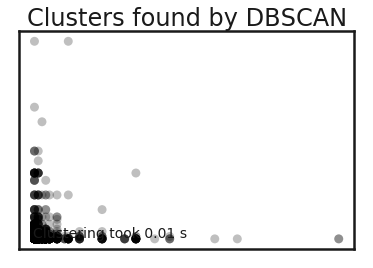

In [290]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})